In [1]:
import numpy as np
import tensorflow as tf

2023-12-06 13:31:40.923318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
def load_emnist_balanced(cnt):
    from scipy import io as spio
    #from keras.utils import to_categorical
    import numpy as np
    emnist = spio.loadmat("data/matlab/emnist-balanced.mat")
    
    classes = 47
    cnt = cnt
    lim_train = cnt*classes
    
    x_train = emnist["dataset"][0][0][0][0][0][0]
    x_train = x_train.astype(np.float32)
    y_train = emnist["dataset"][0][0][0][0][0][1]
    x_test = emnist["dataset"][0][0][1][0][0][0]
    x_test = x_test.astype(np.float32)
    y_test = emnist["dataset"][0][0][1][0][0][1]

    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1, order="A").astype('float32') / 255.
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1, order="A").astype('float32') / 255.
 
    y_train = (y_train.astype('float32'))
    y_test = tf.keras.utils.to_categorical(y_test.astype('float32'))   
    
    #Append equal number of training samples from each class to x_train and y_train
    x_tr = []
    y_tr = []
    count = [0] * classes
    for i in range(0,x_train.shape[0]):
        if (sum(count)==classes*cnt):
            break
        name = (y_train[i])
        if (count[int(name)]>=cnt):
            continue
        count[int(name)] = count[int(name)]+1
        x_tr.append(x_train[i])
        y_tr.append(name)
    x_tr = np.asarray(x_tr)
    y_tr = np.asarray(y_tr)
    y_tr = tf.keras.utils.to_categorical(y_tr.astype('float32'))
    
    print(x_tr.shape,y_tr.shape,x_test.shape,y_test.shape)
    return (x_tr, y_tr), (x_test, y_test)

In [16]:
# Assuming you have the necessary imports and load_emnist_balanced function
from tensorflow.keras import layers, models, callbacks
# Load dataset
(x_train, y_train), (x_test, y_test) = load_emnist_balanced(20000)

# Define the CNN model
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(47, activation='softmax'))  # Assuming 10 classes (adjust as needed)

model = models.Sequential()  
model.add(layers.Conv2D(28, (5, 5), padding='same', input_shape=x_train.shape[1:]))  
model.add(layers.Activation('relu'))  
model.add(layers.BatchNormalization())  
model.add(layers.Conv2D(28, (5, 5)))  
model.add(layers.Activation('relu'))  
model.add(layers.MaxPool2D(pool_size=(2, 2)))  
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (5, 5), padding='same'))
model.add(layers.Activation('relu'))  
model.add(layers.BatchNormalization())  
model.add(layers.Conv2D(32, (5, 5)))  
model.add(layers.Activation('relu'))  
model.add(layers.MaxPool2D(pool_size=(2, 2)))  
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())  
model.add(layers.Dense(512))  
model.add(layers.Activation('relu'))  
model.add(layers.Dropout(0.25))  
model.add(layers.Dense(47))  
model.add(layers.Activation('softmax'))


# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

# Save the model
model.save('emnist_model.hdf5')

# Load and evaluate the model
model = tf.keras.models.load_model('emnist_model.hdf5')
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy}')


(112800, 28, 28, 1) (112800, 47) (18800, 28, 28, 1) (18800, 47)
Epoch 1/100
3525/3525 [==============================] - 310s 87ms/step - loss: 0.6904 - accuracy: 0.7777 - val_loss: 0.4047 - val_accuracy: 0.8593
Epoch 2/100
3525/3525 [==============================] - 355s 101ms/step - loss: 0.4415 - accuracy: 0.8458 - val_loss: 0.3761 - val_accuracy: 0.8624
Epoch 3/100
3525/3525 [==============================] - 394s 112ms/step - loss: 0.3973 - accuracy: 0.8578 - val_loss: 0.3400 - val_accuracy: 0.8775
Epoch 4/100
3525/3525 [==============================] - 414s 118ms/step - loss: 0.3646 - accuracy: 0.8682 - val_loss: 0.3252 - val_accuracy: 0.8827
Epoch 5/100
3525/3525 [==============================] - 417s 118ms/step - loss: 0.3420 - accuracy: 0.8740 - val_loss: 0.3270 - val_accuracy: 0.8820
Epoch 6/100
3525/3525 [==============================] - 414s 117ms/step - loss: 0.3280 - accuracy: 0.8789 - val_loss: 0.3242 - val_accuracy: 0.8836
Epoch 7/100
3525/3525 [====================

KeyboardInterrupt: 

In [15]:
import numpy as np
from scipy import io as spio

# Load the EMNIST dataset
emnist = spio.loadmat("data/matlab/emnist-balanced.mat")

# Extract training and test labels
y_train = emnist["dataset"][0][0][0][0][0][1]
y_test = emnist["dataset"][0][0][1][0][0][1]

# Count the number of samples per class
unique, counts = np.unique(y_train, return_counts=True)
train_counts = dict(zip(unique, counts))

unique, counts = np.unique(y_test, return_counts=True)
test_counts = dict(zip(unique, counts))

print("Training samples per class:", train_counts)
print("Test samples per class:", test_counts)

Training samples per class: {0: 2400, 1: 2400, 2: 2400, 3: 2400, 4: 2400, 5: 2400, 6: 2400, 7: 2400, 8: 2400, 9: 2400, 10: 2400, 11: 2400, 12: 2400, 13: 2400, 14: 2400, 15: 2400, 16: 2400, 17: 2400, 18: 2400, 19: 2400, 20: 2400, 21: 2400, 22: 2400, 23: 2400, 24: 2400, 25: 2400, 26: 2400, 27: 2400, 28: 2400, 29: 2400, 30: 2400, 31: 2400, 32: 2400, 33: 2400, 34: 2400, 35: 2400, 36: 2400, 37: 2400, 38: 2400, 39: 2400, 40: 2400, 41: 2400, 42: 2400, 43: 2400, 44: 2400, 45: 2400, 46: 2400}
Test samples per class: {0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400, 6: 400, 7: 400, 8: 400, 9: 400, 10: 400, 11: 400, 12: 400, 13: 400, 14: 400, 15: 400, 16: 400, 17: 400, 18: 400, 19: 400, 20: 400, 21: 400, 22: 400, 23: 400, 24: 400, 25: 400, 26: 400, 27: 400, 28: 400, 29: 400, 30: 400, 31: 400, 32: 400, 33: 400, 34: 400, 35: 400, 36: 400, 37: 400, 38: 400, 39: 400, 40: 400, 41: 400, 42: 400, 43: 400, 44: 400, 45: 400, 46: 400}


(10000,)

In [6]:
X_test.shape



(10000, 28, 28)

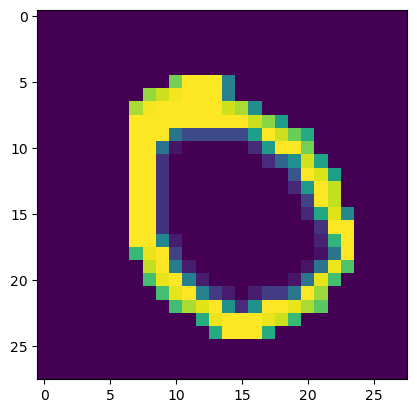

In [7]:
import matplotlib.pyplot as plt

plt.imshow(test[0])

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks


2023-11-18 18:43:57.312045: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Create a simple CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes (adjust as needed)

# Compile the model with Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping and Adam optimizer
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1675 - accuracy: 0.9435 - val_loss: 0.1758 - val_accuracy: 0.9436
Epoch 2/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0606 - accuracy: 0.9795 - val_loss: 0.1619 - val_accuracy: 0.9498
Epoch 3/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.1778 - val_accuracy: 0.9470
Epoch 4/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.1676 - val_accuracy: 0.9512
Epoch 5/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.1845 - val_accuracy: 0.9510
313/313 - 1s - loss: 0.1845 - accuracy: 0.9510 - 646ms/epoch - 2ms/step

Test accuracy: 0.9509999752044678


In [11]:
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.9609999752044678
